In [63]:
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Conv1D, Add, MaxPool1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (ModelCheckpoint, TensorBoard, ReduceLROnPlateau, CSVLogger, EarlyStopping)
%load_ext tensorboard
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [64]:
mit_dir=r'C:\Users\kramorov.s\Documents\arryth\mit'
data_dir=r'C:\Users\kramorov.s\Documents\arryth\data'
file_with_files_to_read='RECORDS_GOOD'
label_desc= {'!': ['Ventricular flatter wave',      [0,0,0,0,0,0,0,0,0,0,0,0,1]], \
             '+':['Rhytm change',                   [0,0,0,0,0,0,0,0,0,0,0,1,0]],\
             'A':['Atrial premature contraction',   [0,0,0,0,0,0,0,0,0,0,1,0,0]],\
             'E':['Ventricular escape beat',        [0,0,0,0,0,0,0,0,0,1,0,0,0]],\
             'F':['Fusion of vetricular and normal beat', [0,0,0,0,0,0,0,0,1,0,0,0,0]],\
             'L':['Left bundle branch block beat',  [0,0,0,0,0,0,0,1,0,0,0,0,0]],\
             'N':['Normal beat',                    [0,0,0,0,0,0,1,0,0,0,0,0,0]], \
             'R':['Right bundle branch block beat', [0,0,0,0,0,1,0,0,0,0,0,0,0]],\
             'V':['Prematural ventricular contraction',[0,0,0,0,1,0,0,0,0,0,0,0,0]], \
             'a':['Aberrated atrial premature beat',[0,0,0,1,0,0,0,0,0,0,0,0,0]], \
             'j':['Nodal (junctional) escape beat', [0,0,1,0,0,0,0,0,0,0,0,0,0]],\
             'x':['Non-conducted P-wave (blocked APB)',[0,1,0,0,0,0,0,0,0,0,0,0,0]],\
             '~':['Signal quality change',          [1,0,0,0,0,0,0,0,0,0,0,0,0]],}
allowed_labels=list(label_desc.keys())
desired_signal_length=256
def get_result_desc(value_to_find):
    value_to_find_index=value_to_find.argmax()
    for k, v in label_desc.items():
        if value_to_find_index==np.array(v[1]).argmax():
            return k
    return 'Not found in dict'

In [ ]:
def conv_unit(unit, input_layer):
    s = '_' + str(unit)
    layer = keras.Conv1D(name='Conv1' + s, filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
    layer = keras.Conv1D(name='Conv2' + s, filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
    layer = keras.Add(name='ResidualSum' + s)([layer, input_layer])
    layer = keras.Activation("relu", name='Act' + s)(layer)
    layer = keras.MaxPooling1D(name='MaxPool' + s, pool_size=5, strides=2)(layer)
    return layer

def cnn_model(input_layer, mode, params):
    current_layer = keras.Conv1D(filters=32, kernel_size=5, strides=1)(input_layer)

    for i in range(5):
        current_layer = conv_unit(i + 1, current_layer)

    current_layer = keras.Flatten()(current_layer)
    current_layer = keras.Dense(32, name='FC1', activation='relu')(current_layer)
    logits = keras.Dense(5, name='Output')(current_layer)

    print('Parameter count:', parameter_count())
    return logits

In [49]:
a=np.array([0,1,2,3,4,5])
b=np.array([6,7,8,9,8,7])

In [53]:
c=np.hstack([a,b])
c.shape

(12,)

In [61]:
z=c.reshape(2,6)

In [68]:
train_x_b0=np.vstack(validation.pop('bpass0'))
train_x_b1=np.vstack(validation.pop('bpass1'))

In [70]:
train_x_b1.shape

(5258, 256)

In [65]:
data_fname=f'{data_dir}\{"file1"}'
df=pd.read_hdf(data_fname, key='df', errors="strict")

In [188]:
df.dtypes

index             int64
label            object
label_encoded    object
bpass0           object
bpass1           object
dtype: object

In [67]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
validation, test  = train_test_split(test, test_size=0.3, random_state=200)

In [231]:
# train_dataset=tf.data.Dataset.from_tensor_slices(( \
#     tf.convert_to_tensor(np.vstack(train.pop('label_encoded')), name='labels'), \
#      tf.convert_to_tensor((np.vstack(train.pop('bpass0'))), name='bpass0'), \
#      tf.convert_to_tensor(np.vstack(train.pop('bpass1')), name='bpass1')  \
#     ))
# test_dataset=tf.data.Dataset.from_tensor_slices(( \
#     tf.convert_to_tensor(np.vstack(test.pop('label_encoded')), name='labels'), \
#      tf.convert_to_tensor((np.vstack(test.pop('bpass0'))), name='bpass0'), \
#      tf.convert_to_tensor(np.vstack(test.pop('bpass1')), name='bpass1')  \
#     ))
# val_dataset=tf.data.Dataset.from_tensor_slices(( \
#     tf.convert_to_tensor(np.vstack(validation.pop('label_encoded'))), \
#      tf.convert_to_tensor((np.vstack(validation.pop('bpass0')))), \
#      tf.convert_to_tensor(np.vstack(validation.pop('bpass1')))  \
#     ))
# train_x=   tf.convert_to_tensor((np.vstack(train.pop('bpass0'))), name='bpass0')
# train_y=   tf.convert_to_tensor(np.vstack(train.pop('label_encoded')), name='labels')
# test_x=tf.data.Dataset.from_tensor_slices(( \
#      tf.convert_to_tensor((np.vstack(test.pop('bpass0'))), name='bpass0'), \
#     ))
# test_y=np.vstack(test.pop('label_encoded')), name='labels')
# val_x=tf.convert_to_tensor((np.vstack(validation.pop('bpass0'))))
# val_y=tf.convert_to_tensor(np.vstack(validation.pop('label_encoded')))

In [5]:
train_x=np.vstack(train.pop('bpass0'))
train_y=np.vstack(train.pop('label_encoded'))

test_x=np.vstack(test.pop('bpass0'))
test_y=np.vstack(test.pop('label_encoded'))

val_x=np.vstack(validation.pop('bpass0'))
val_y=np.vstack(validation.pop('label_encoded'))

In [7]:
len(test_x)

2254

In [6]:
def get_basic_model():
    input_layer = Input(256)
    x = Dense(256, activation='relu')(input_layer)
    x = Dense(128, activation='relu')(x)
    x = Dense(13, activation='relu')(x)
    out = Activation("softmax")(x)

    model = Model(input_layer, out)
    return model


In [8]:
BATCH_SIZE=128
cur_model = get_basic_model()
cur_model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [12]:
cur_model.fit(train_x, train_y, epochs=100, batch_size=BATCH_SIZE, validation_data=(val_x, val_y))
#cur_model.fit(t_x, t_y, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7437 - accuracy: 0.4332 - val_loss: 1.7263 - val_accuracy: 0.4369
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7433 - accuracy: 0.4319 - val_loss: 1.7133 - val_accuracy: 0.4313
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7315 - accuracy: 0.4332 - val_loss: 1.7050 - val_accuracy: 0.4376
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7247 - accuracy: 0.4340 - val_loss: 1.7029 - val_accuracy: 0.4479
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7182 - accuracy: 0.4344 - val_loss: 1.6708 - val_accuracy: 0.4443
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7251 - accuracy: 0.4353 - val_loss: 1.6837 - val_accuracy: 0.4431
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 1.7178 - accuracy: 0.4367 - val_loss: 1.7001 - val_accuracy: 0.4471

In [38]:
class ResidualUnit(object):
    """Residual unit block (unidimensional).
    Parameters
    ----------
    n_samples_out: int
        Number of output samples.
    n_filters_out: int
        Number of output filters.
    kernel_initializer: str, optional
        Initializer for the weights matrices. See Keras initializers. By default it uses
        'he_normal'.
    dropout_keep_prob: float [0, 1), optional
        Dropout rate used in all Dropout layers. Default is 0.8
    kernel_size: int, optional
        Kernel size for convolutional layers. Default is 17.
    preactivation: bool, optional
        When preactivation is true use full preactivation architecture proposed
        in [1]. Otherwise, use architecture proposed in the original ResNet
        paper [2]. By default it is true.
    postactivation_bn: bool, optional
        Defines if you use batch normalization before or after the activation layer (there
        seems to be some advantages in some cases:
        https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md).
        If true, the batch normalization is used before the activation
        function, otherwise the activation comes first, as it is usually done.
        By default it is false.
    activation_function: string, optional
        Keras activation function to be used. By default 'relu'.
    References
    ----------
    .. [1] K. He, X. Zhang, S. Ren, and J. Sun, "Identity Mappings in Deep Residual Networks,"
           arXiv:1603.05027 [cs], Mar. 2016. https://arxiv.org/pdf/1603.05027.pdf.
    .. [2] K. He, X. Zhang, S. Ren, and J. Sun, "Deep Residual Learning for Image Recognition," in 2016 IEEE Conference
           on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 770-778. https://arxiv.org/pdf/1512.03385.pdf
    """

    def __init__(self, n_samples_out, n_filters_out, kernel_initializer='he_normal',
                 dropout_keep_prob=0.8, kernel_size=17, preactivation=True,
                 postactivation_bn=False, activation_function='relu'):
        self.n_samples_out = n_samples_out
        self.n_filters_out = n_filters_out
        self.kernel_initializer = kernel_initializer
        self.dropout_rate = 1 - dropout_keep_prob
        self.kernel_size = kernel_size
        self.preactivation = preactivation
        self.postactivation_bn = postactivation_bn
        self.activation_function = activation_function

    def _skip_connection(self, y, downsample, n_filters_in):
        """Implement skip connection."""
        # Deal with downsampling
        if downsample > 1:
            y = MaxPooling1D(downsample, strides=downsample, padding='same')(y)
        elif downsample == 1:
            y = y
        else:
            raise ValueError("Number of samples should always decrease.")
        # Deal with n_filters dimension increase
        if n_filters_in != self.n_filters_out:
            # This is one of the two alternatives presented in ResNet paper
            # Other option is to just fill the matrix with zeros.
            y = Conv1D(self.n_filters_out, 1, padding='same',
                       use_bias=False, kernel_initializer=self.kernel_initializer)(y)
        return y

    def _batch_norm_plus_activation(self, x):
        if self.postactivation_bn:
            x = Activation(self.activation_function)(x)
            x = BatchNormalization(center=False, scale=False)(x)
        else:
            x = BatchNormalization()(x)
            x = Activation(self.activation_function)(x)
        return x

    def __call__(self, inputs):
        """Residual unit."""
        x, y = inputs
        n_samples_in = y.shape[1]
        downsample = n_samples_in // self.n_samples_out
        n_filters_in = y.shape[2]
        y = self._skip_connection(y, downsample, n_filters_in)
        # 1st layer
        x = Conv1D(self.n_filters_out, self.kernel_size, padding='same',
                   use_bias=False, kernel_initializer=self.kernel_initializer)(x)
        x = self._batch_norm_plus_activation(x)
        if self.dropout_rate > 0:
            x = Dropout(self.dropout_rate)(x)

        # 2nd layer
        x = Conv1D(self.n_filters_out, self.kernel_size, strides=downsample,
                   padding='same', use_bias=False,
                   kernel_initializer=self.kernel_initializer)(x)
        if self.preactivation:
            x = Add()([x, y])  # Sum skip connection and main connection
            y = x
            x = self._batch_norm_plus_activation(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = Add()([x, y])  # Sum skip connection and main connection
            x = Activation(self.activation_function)(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
            y = x
        return [x, y]


def get_model_cnn(n_classes, last_layer='sigmoid'):
    kernel_size = 16
    kernel_initializer = 'he_normal'
    signal = Input(shape=(256, 1), dtype=np.float32, name='signal')
    x = signal
    x = Conv1D(64, kernel_size, padding='same', use_bias=False,
               kernel_initializer=kernel_initializer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x, y = ResidualUnit(196, 256, kernel_size=kernel_size,
    #                     kernel_initializer=kernel_initializer)([x, x])
    # x, y = ResidualUnit(128, 128, kernel_size=kernel_size,
    #                     kernel_initializer=kernel_initializer)([x, y])
    x, y = ResidualUnit(128, 128, kernel_size=kernel_size,
                    kernel_initializer=kernel_initializer)([x, x])
    x, y = ResidualUnit(64, 256, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, _ = ResidualUnit(16, 320, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x = Flatten()(x)
    diagn = Dense(n_classes, activation=last_layer, kernel_initializer=kernel_initializer)(x)
    model = Model(signal, diagn)
    return model

In [39]:
loss = 'categorical_crossentropy'
lr = 0.001
#batch_size = 64
opt = Adam(lr)
model2 = get_model_cnn(13)
model2.compile(loss=loss, optimizer=opt)

In [40]:
model2.fit(train_x, train_y, epochs=10, batch_size=BATCH_SIZE, validation_data=(val_x, val_y))

Epoch 1/10
 11/235 [>.............................] - ETA: 25:13 - loss: 2.2644

KeyboardInterrupt: 

In [42]:
callbacks = [ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=7,
                                   min_lr=lr / 100),
                 EarlyStopping(patience=9,  # Patience should be larger than the one in ReduceLROnPlateau
                               min_delta=0.00001)]
callbacks += [TensorBoard(log_dir='./logs', write_graph=False),
              CSVLogger('training.log', append=False)]  # Change append to true if continuing training
# Save the BEST and LAST model
callbacks += [ModelCheckpoint('./backup_model_last.hdf5'),
              ModelCheckpoint('./backup_model_best.hdf5', save_best_only=True)]
# Train neural network
history = model2.fit(train_x, train_y,
                    epochs=3,
                    initial_epoch=0,  # If you are continuing a interrupted section change here
                    callbacks=callbacks,
                    validation_data=(val_x, val_y),
                    verbose=1)

Epoch 1/3
939/939 [==============================] - 1820s 2s/step - loss: 0.4464 - val_loss: 0.4257 - lr: 0.0010
Epoch 2/3
939/939 [==============================] - 1847s 2s/step - loss: 0.2525 - val_loss: 0.2082 - lr: 0.0010
Epoch 3/3
939/939 [==============================] - 1760s 2s/step - loss: 0.2048 - val_loss: 0.1822 - lr: 0.0010


In [ ]:
  # Import data
    seq = ECGSequence(args.path_to_hdf5, args.dataset_name, batch_size=args.bs)
    # Import model
    model = load_model(args.path_to_model, compile=False)
    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    y_score = model.predict(seq,  verbose=1)

In [56]:
val_x[0].shape

(256,)

In [58]:
y_score = model2.predict(val_x,  verbose=1)

165/165 [==============================] - 64s 382ms/step


In [86]:
result_true=0
result_wrong=0
wrong_results=list()
for i in  range(len(val_y)):
    y_predicted=y_score[i].argmax()
    y_true=val_y[i].argmax()
    if y_predicted==y_true:
        result_true+=1
    else:
        result_wrong+=1
        #wrong_results.append(f'Предсказано: {get_result_desc(y_predicted)}, правильно: {get_result_desc(y_true)}')
        wrong_results.append(f'Неправильно #{y_predicted} / {y_true} Предсказано: {get_result_desc(y_predicted)}, правильно: {get_result_desc(y_true)}')
print(f'Результат опознания: из {i} образцов, правильных - {result_true} шт. это {result_true/i} процентов, неправильных {result_wrong}шт. это {result_wrong/i}процентов')


Результат опознания: из 5257 образцов, правильных - 4947 шт. это 0.9410310062773445 процентов, неправильных 311шт. это 0.059159216283051166процентов


In [88]:
np.array(label_desc['V'][1]).argmax()

4

In [84]:
wrong_results

['Неправильно #4 / 6 Предсказано: ~, правильно: ~',
 'Неправильно #12 / 1 Предсказано: ~, правильно: ~',
 'Неправильно #0 / 6 Предсказано: ~, правильно: ~',
 'Неправильно #12 / 1 Предсказано: ~, правильно: ~',
 'Неправильно #10 / 2 Предсказано: ~, правильно: ~',
 'Неправильно #11 / 0 Предсказано: ~, правильно: ~',
 'Неправильно #11 / 0 Предсказано: ~, правильно: ~',
 'Неправильно #8 / 4 Предсказано: ~, правильно: ~',
 'Неправильно #7 / 4 Предсказано: ~, правильно: ~',
 'Неправильно #12 / 4 Предсказано: ~, правильно: ~',
 'Неправильно #10 / 5 Предсказано: ~, правильно: ~',
 'Неправильно #4 / 6 Предсказано: ~, правильно: ~',
 'Неправильно #11 / 0 Предсказано: ~, правильно: ~',
 'Неправильно #6 / 3 Предсказано: ~, правильно: ~',
 'Неправильно #6 / 0 Предсказано: ~, правильно: ~',
 'Неправильно #4 / 8 Предсказано: ~, правильно: ~',
 'Неправильно #12 / 11 Предсказано: ~, правильно: ~',
 'Неправильно #6 / 10 Предсказано: ~, правильно: ~',
 'Неправильно #4 / 8 Предсказано: ~, правильно: ~',
 

In [11]:
model2=tf.keras.models.load_model('backup_model_best.hdf5', compile=False)
model2.compile(loss='categorical_crossentropy', optimizer=Adam())

In [13]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 signal (InputLayer)            [(None, 256, 1)]     0           []                               
                                                                                                  
 conv1d_71 (Conv1D)             (None, 256, 64)      1024        ['signal[0][0]']                 
                                                                                                  
 batch_normalization_49 (BatchN  (None, 256, 64)     256         ['conv1d_71[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_50 (Activation)     (None, 256, 64)      0           ['batch_normalization_49[0]

In [ ]:
model2_c1= Model(inputs=model2.input, outputs=model2.get_layer('conv1d_71').output)  # to take the features of the first VGG block
features_maps = VGG_model.predict(img)         # extracting feature maps from the img
single_fm= features_maps[1]

In [25]:
layer_dict = dict([(layer.name, layer) for layer in model2.layers])

In [18]:
layer_output = layer_dict['conv1d_71'].output

In [43]:
weights_c1 = layer_dict['conv1d_71'].get_weights()
weights_c2 = layer_dict['conv1d_76'].get_weights()
#n_fmap=weights[1].shape[0]

In [45]:
weights_c1[0].shape

(16, 1, 64)

In [35]:
features_map=weights[0]

In [41]:
tyfeatures_map.shape[0]

numpy.ndarray

In [48]:
features_map[1].shape[0]

1

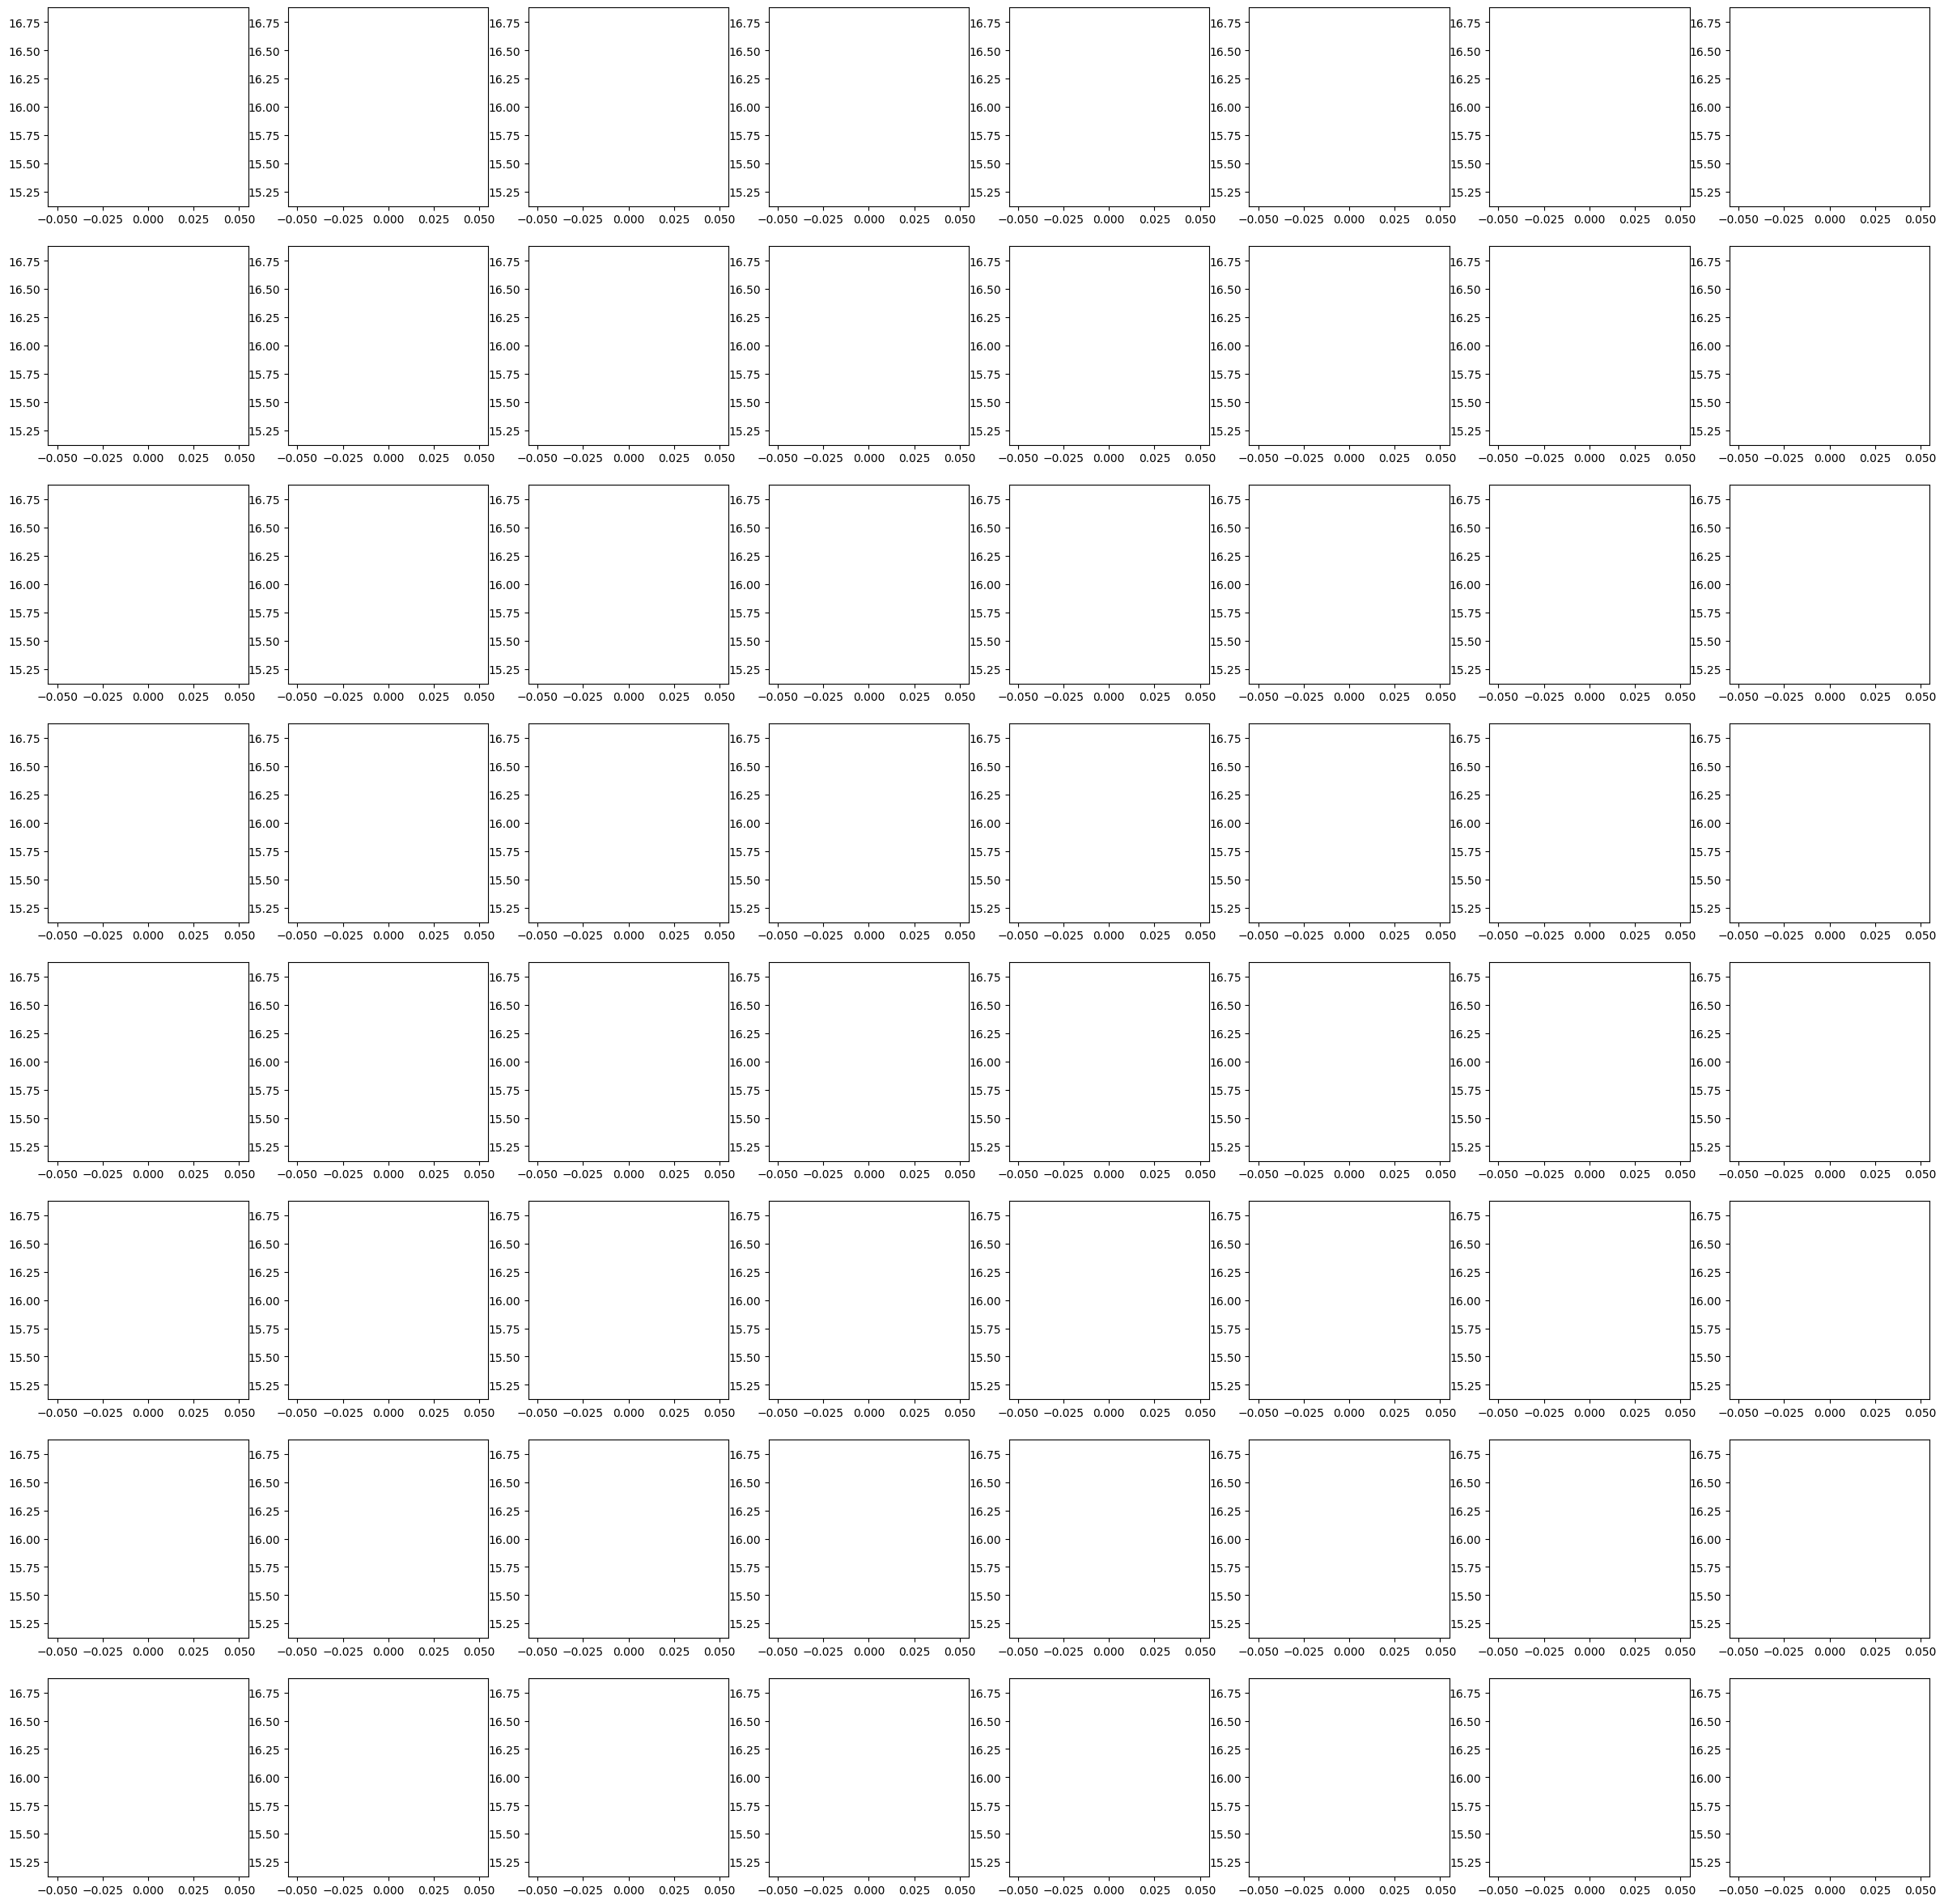

In [46]:
rows=8
cols=8
fig, axs = plt.subplots(8, 8, figsize=(30, 30))
for row in  range(0, rows):
    for col in range(0, cols):
        cur_index=row*rows+col
        axs[row,col].plot(features_map.shape[0])

In [15]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
import os

#to get the current working directory
directory = os.getcwd()

print(directory)
res = os.listdir(directory)
print(res)

C:\Users\kramorov.s\PycharmProjects\arryth
['.idea', 'arr_data.ipynb', 'arr_model.ipynb', 'arr_test.ipynb', 'arr_test1.ipynb', 'backup_model_best.hdf5', 'backup_model_last.hdf5', 'Classificatin.html', 'Classification', 'logs', 'main.py', 'training.log', 'venv']
